## Задача регрессии

### Датасет

Этот набор данных предназначен для прогнозирования сроков доставки продуктов на основе различных влияющих факторов, таких как расстояние, погода, дорожные условия и время суток. Он представляет собой практическую и увлекательную задачу для специалистов по машинному обучению, особенно тех, кто интересуется исследованиями в области логистики и операций.

* Order_ID: Уникальный идентификатор для каждого заказа.

* Distance_km: Расстояние доставки в километрах.

* Weather: Погодные условия во время доставки, включая ясную погоду, дождь, снег, туман и ветер.

* Traffic_Level: Дорожные условия, классифицируемые как низкие, средние или высокие.

* Time_of_Day: Время, когда была осуществлена доставка, может быть указано утром, днем, вечером или ночью.

* Vehicle_Type: Тип транспортного средства, используемого для доставки, включая велосипед, скутер и автомобиль.

* Preparation_Time_min: Время, необходимое для подготовки заказа, измеряется в минутах.

* Courier_Experience_yrs: Опыт работы курьера в годах.

* Delivery_Time_min: Общее время доставки в минутах (целевая переменная).

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df = pd.read_csv('./Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [9]:
df.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

### Создание бейзлайна

In [11]:
df.drop(columns=['Order_ID'], inplace=True)

# Кодирование категориальных переменных
label_encoders = {}
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Выделите признаки и целевую переменную
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [13]:
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 115.02734463276839
R^2 Score: 0.7185669929559194


### Улучшение бейзлайна

In [14]:
df = pd.read_csv('./Food_Delivery_Times.csv')
df.dropna(inplace=True)
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [15]:
df.drop(columns=['Order_ID'], inplace=True)

categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

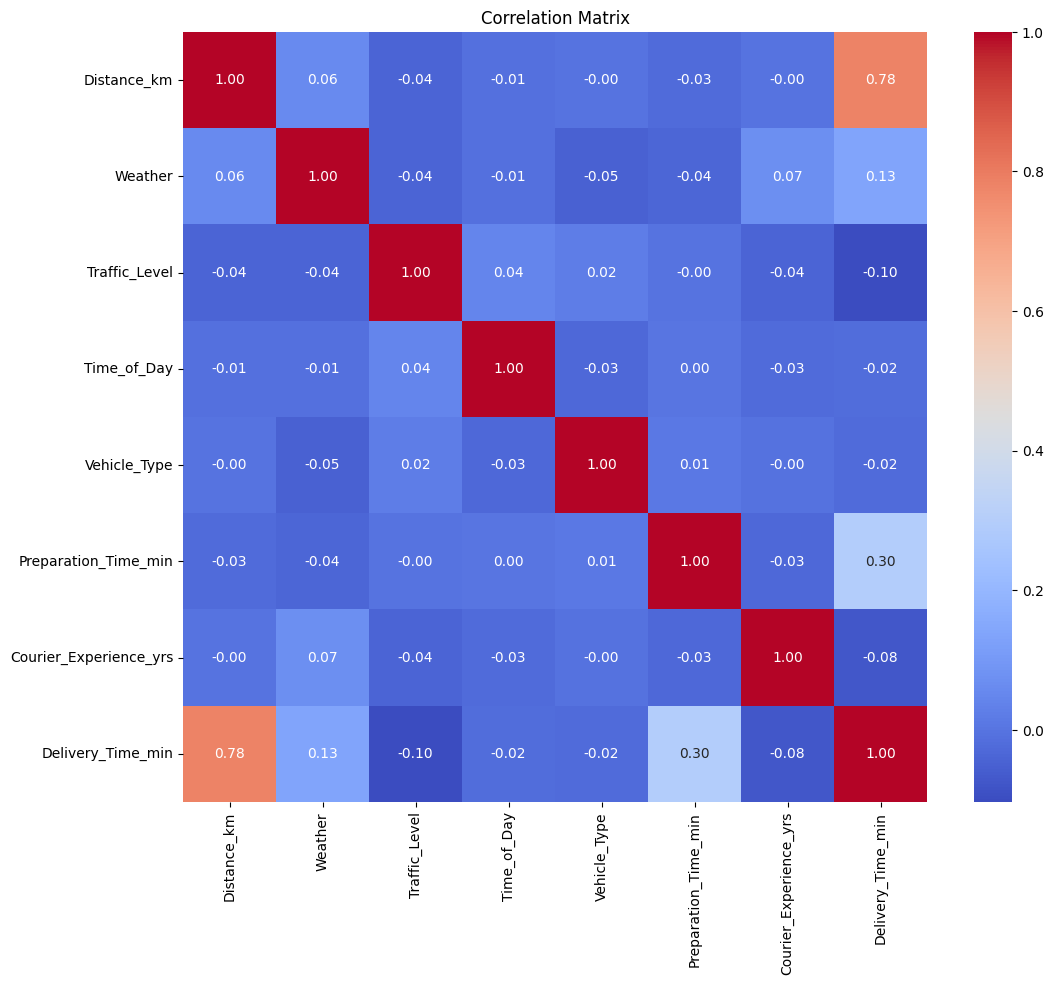

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

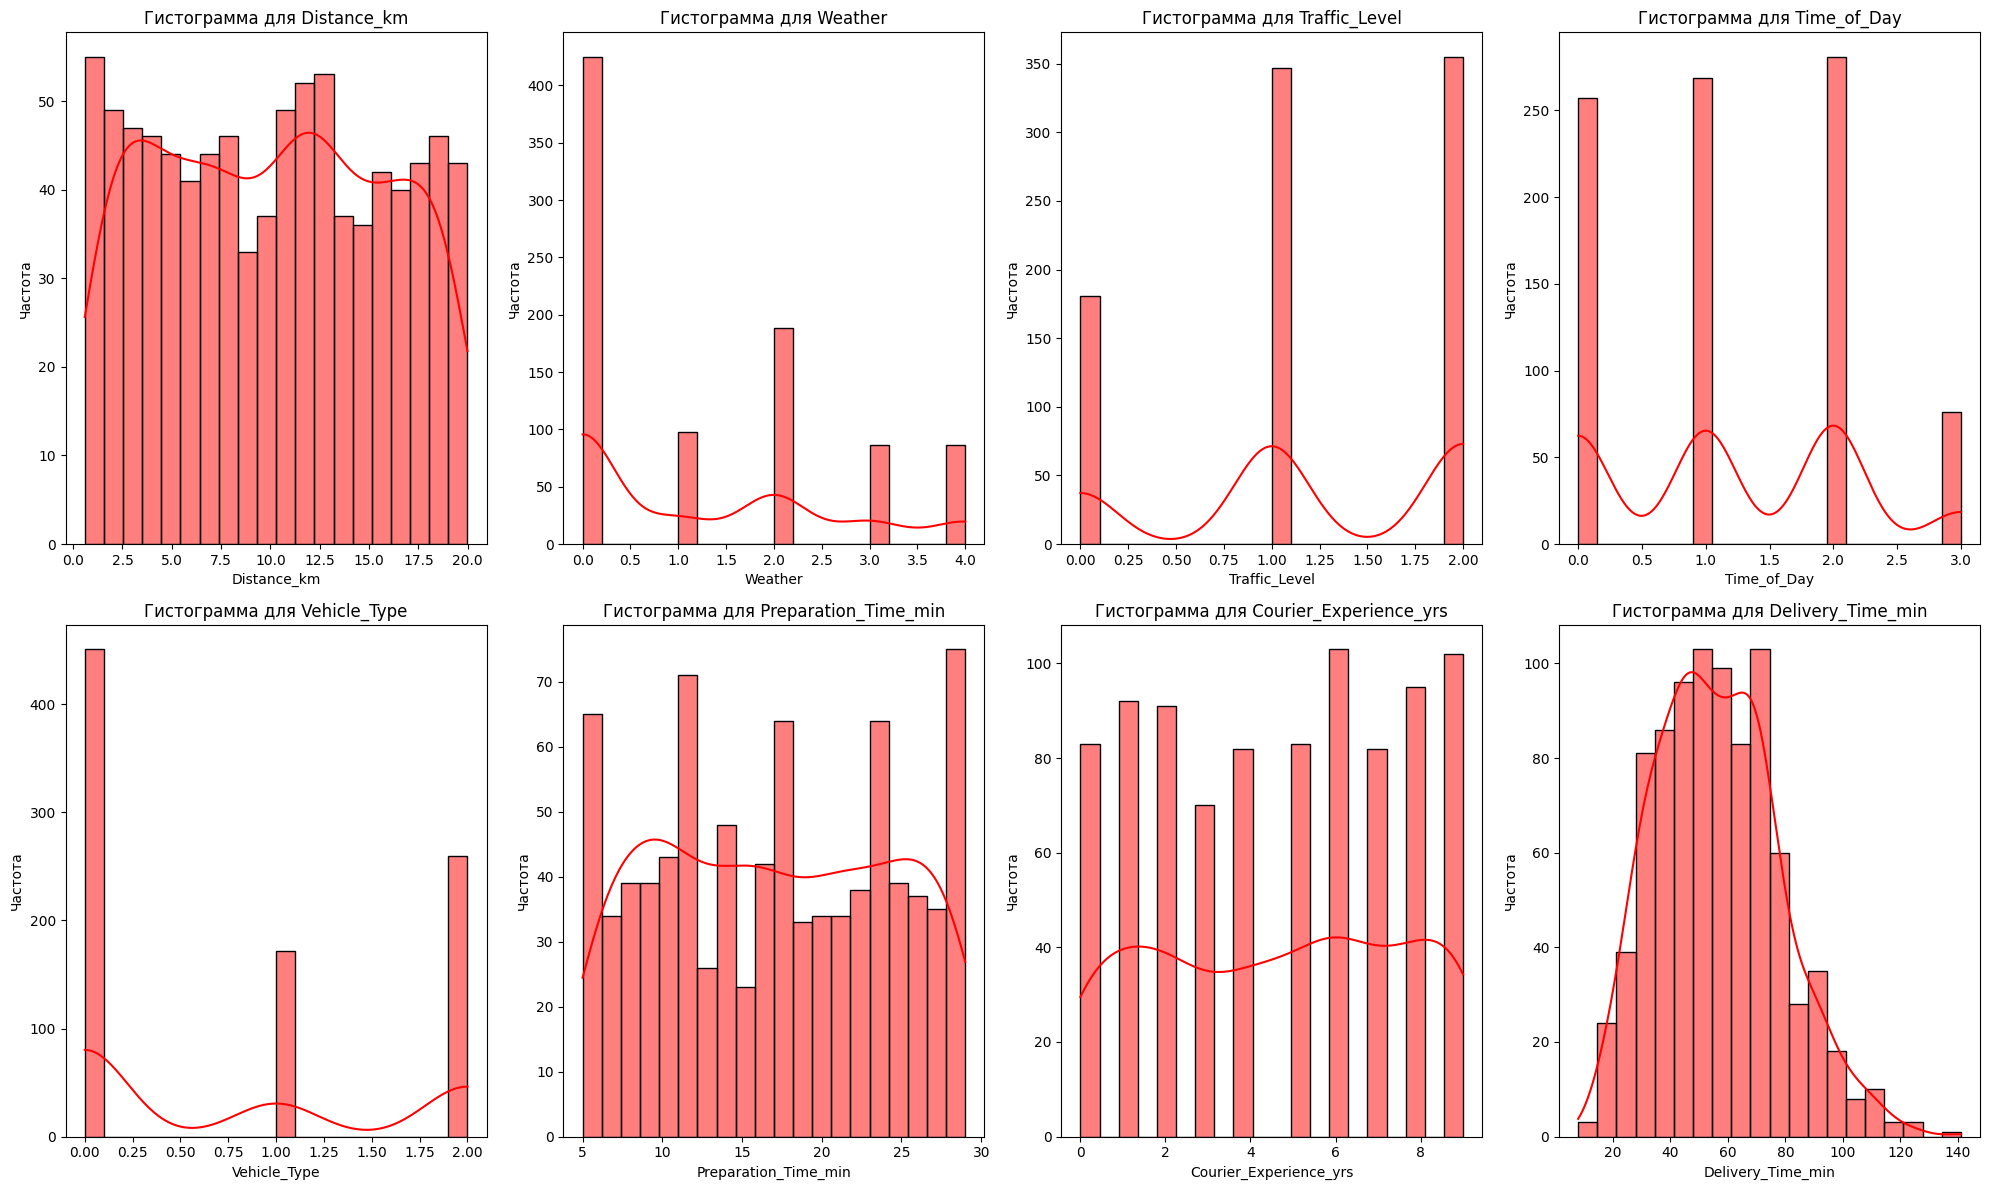

In [17]:
numerical_columns = df.select_dtypes(include=["number"]).columns
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()
for idx, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[idx], color='red', bins=20)
    axes[idx].set_title(f'Гистограмма для {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

param_grid = {
    'regressor__n_neighbors': range(1, 30),
    'regressor__weights': ['uniform', 'distance'],
    'regressor__metric': ['euclidean', 'manhattan', 'minkowski']
}

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']),
        ('cat', OneHotEncoder(), ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'])
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_score = grid_search.best_score_
print("Лучшие параметры:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print("MSE Score:", mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))

Лучшие параметры: {'regressor__metric': 'euclidean', 'regressor__n_neighbors': 29, 'regressor__weights': 'distance'}
MSE Score: 104.24395683053761
R^2 Score: 0.7449502956827019


### Итоги
Немного улучшили показатели

### Имплементация алгоритма машинного обучения

In [19]:

import numpy as np
from collections import Counter

class KNN:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            distances = [self._euclidean_distance(x, x_train_dist) for x_train_dist in self.X_train]
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_values = [self.y_train[i] for i in k_indices]
            predictions.append(np.mean(k_nearest_values))
            
        return predictions

In [20]:

knn_class = KNN(2)
knn_class.fit(X_train, y_train)
print("KNN Results:")
print(f"MSE: {mean_squared_error(y_test, knn_class.predict(X_test))}")
print(f"R2: {r2_score(y_test, knn_class.predict(X_test))}")

KNN Results:
MSE: 162.92655367231637
R2: 0.6013738292080295


### Выводы
В библиотеке круче короче. Привести сравнение

## Логистическая и линейная регрессия
### Создание бейзлайна и оценка качества

In [21]:
from sklearn.linear_model import LinearRegression


logReg = LinearRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)

print("LinearRegression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")


LinearRegression Results:
MSE: 92.12916786377353
R2: 0.7745910867442178


In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Оценка улучшенной модели
y_pred_poly = model_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("LinearRegression Results:")
print(f"MSE: {mse_poly}")
print(f"R2: {r2_poly}")

LinearRegression Results:
MSE: 98.41185963582703
R2: 0.7592194649495474


Несмотря на то, что мы добавили полиномиальные параметры, модель не только не улучшилась, а показала более худшие результаты. Это сведетельствует о том, что имеет место переобучение.

### Собственная реализация


In [23]:
class MyLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.weights = np.linalg.pinv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.weights

In [24]:
import numpy as np


X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

linear_model = MyLinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

print("LinearRegression Results:")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2: {r2_score(y_test, y_pred)}")

LinearRegression Results:
MSE: 92.12916786377498
R2: 0.7745910867442143
